The goal of this project are to analyze the data collected by HR department and to build a model that predicts whether or not an employee will leave the company.

In [1]:
# import packages

# for manipulation
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for display all of the columns in dataframe
pd.set_option('display.max_columns', None)

import scipy.stats as stats

# for metrics and helpfull functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.tree import plot_tree



In [2]:
# load dataset
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
# display first few rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# get shape of dataframe
df.shape

(14999, 10)

This dataframe contain 14999 rows and 10 columns

In [5]:
# get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Zero missing values in the dataset and department and salary columns are objective datatype. Some column name needed to be standardize so that they are all in snake_case.

In [6]:
#get diescriptive statistics of dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


in average_monthly_hours max value is 310. If someone work 8 hours a day for 6 days in week will result a 208 working hours in a month. This shows that 50% employees had to work beyound normal working time.

In [7]:
# get column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
#rename columns
df.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                     'time_spend_company' : 'tenure',
                     'Work_accident' : 'work_accident',
                     'Department' : 'department'},inplace = True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
#check for duplicates
df.duplicated().sum()


3008

Found 3008 duplicate rows in the dataframe.

In [10]:
# drop duplicate values and save to new dataframe
df1 = df.drop_duplicates(keep = 'first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


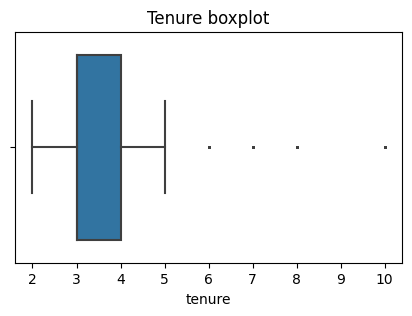

In [11]:
#create boxplot of tenure
plt.figure(figsize = (5,3))
sns.boxplot(x = df1.tenure, fliersize = 1)
plt.title('Tenure boxplot')
plt.show()

In [12]:
# calculate upper, lower limit and iqr for tenure

q1 = np.percentile(df1['tenure'], 25)
q3 = np.percentile(df1['tenure'], 75)
iqr = stats.iqr(df1['tenure'])

#calcualte upper_limit and lower_limit for tenure

upper_limit = q3 + (iqr*1.5)
lower_limit = q1 - (iqr*1.5)

#count outliers in tenure
tenure_outliers  = df1[(df1['tenure']<lower_limit ) | (df1['tenure'] > upper_limit)]

In [13]:
print(f'upper limit for tenure : {upper_limit}')
print(f'lower limit for tenure : {lower_limit}')
print(f'No.of outliers in dataframs : {len(tenure_outliers)}')

upper limit for tenure : 5.5
lower limit for tenure : 1.5
No.of outliers in dataframs : 824


In [14]:
# get how many peoples stayed vs. left
print(df1['left'].value_counts())

#get percentage of peoples stayed vs. left

print(df1['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


~83% choose to stay in the company and ~17% choose to leave.

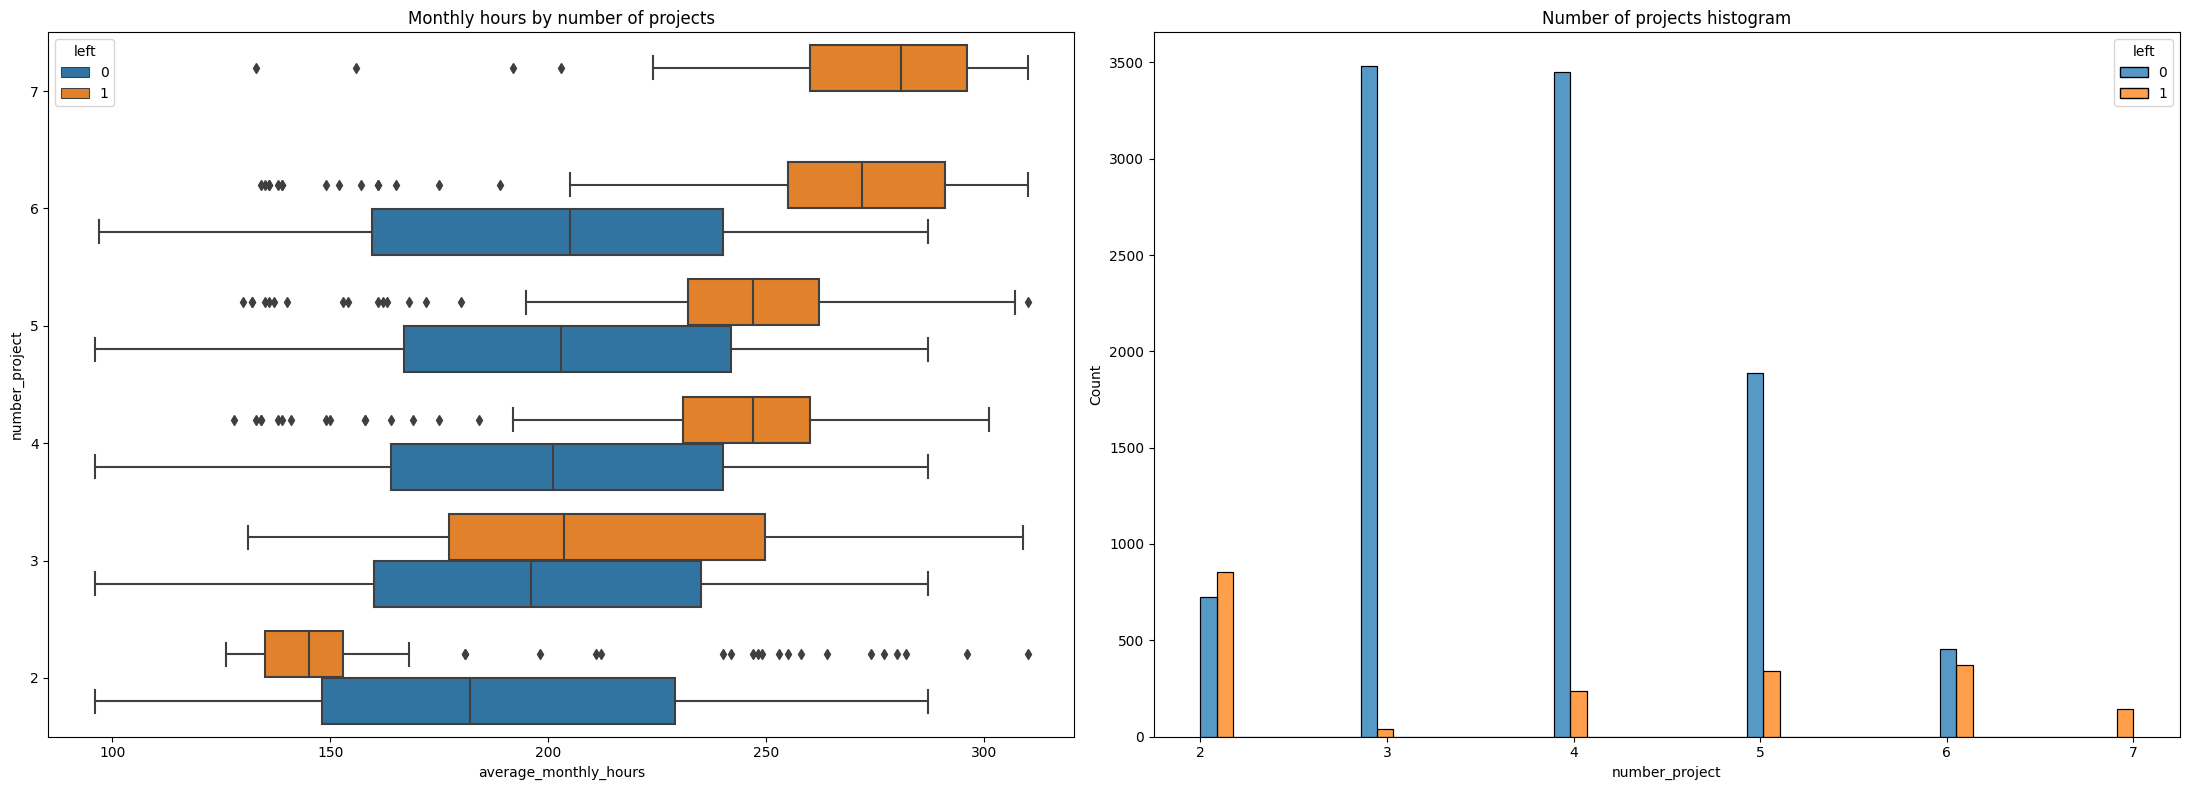

In [15]:
# create boxplot showing 'average_monthly_hours' distribution for 'number_poject'

fig, axs = plt.subplots(1,2, figsize = (22,8))

sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project',
            hue = 'left', orient = 'h',ax = axs[0])
axs[0].invert_yaxis()
axs[0].set_title('Monthly hours by number of projects')

sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', ax = axs[1])
axs[1].set_title('Number of projects histogram')
fig.tight_layout()
plt.show()
                         

* There are two group of employees who left the company : (A) Those who worked considerably less than their peers with the same numbe of projects. And (B) those who worked much more. Of those in group A, It is possible that they were fired. It is also possible that this group includes employees who had already given their notice and were assigned to fewer hours because they were already in their way out the door. For those in group B, It is reasonable to infer that they probably quit. The floks in group B likely contributed alot to the project they workedin; they might have been the largest contributor to their projects.
* Everyone with seven projects left the company, and the interquartile range of this group and those who left with six projects was ~255-295 hours/month - much more than any other group.
* The optimum number of projects for employees to work on seems to be 3-4. The ratio of left/stayed is very small for these projects.
* Assume that work week of 40 hours and two week vacation per year, then the average number of working hours per month of employee working Monday-Friday = 50 weeks * 40 hour per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every groupl-even those who didn't leave the company-worked considerably more hours than this. It seems that employees are overworked.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project'] ==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

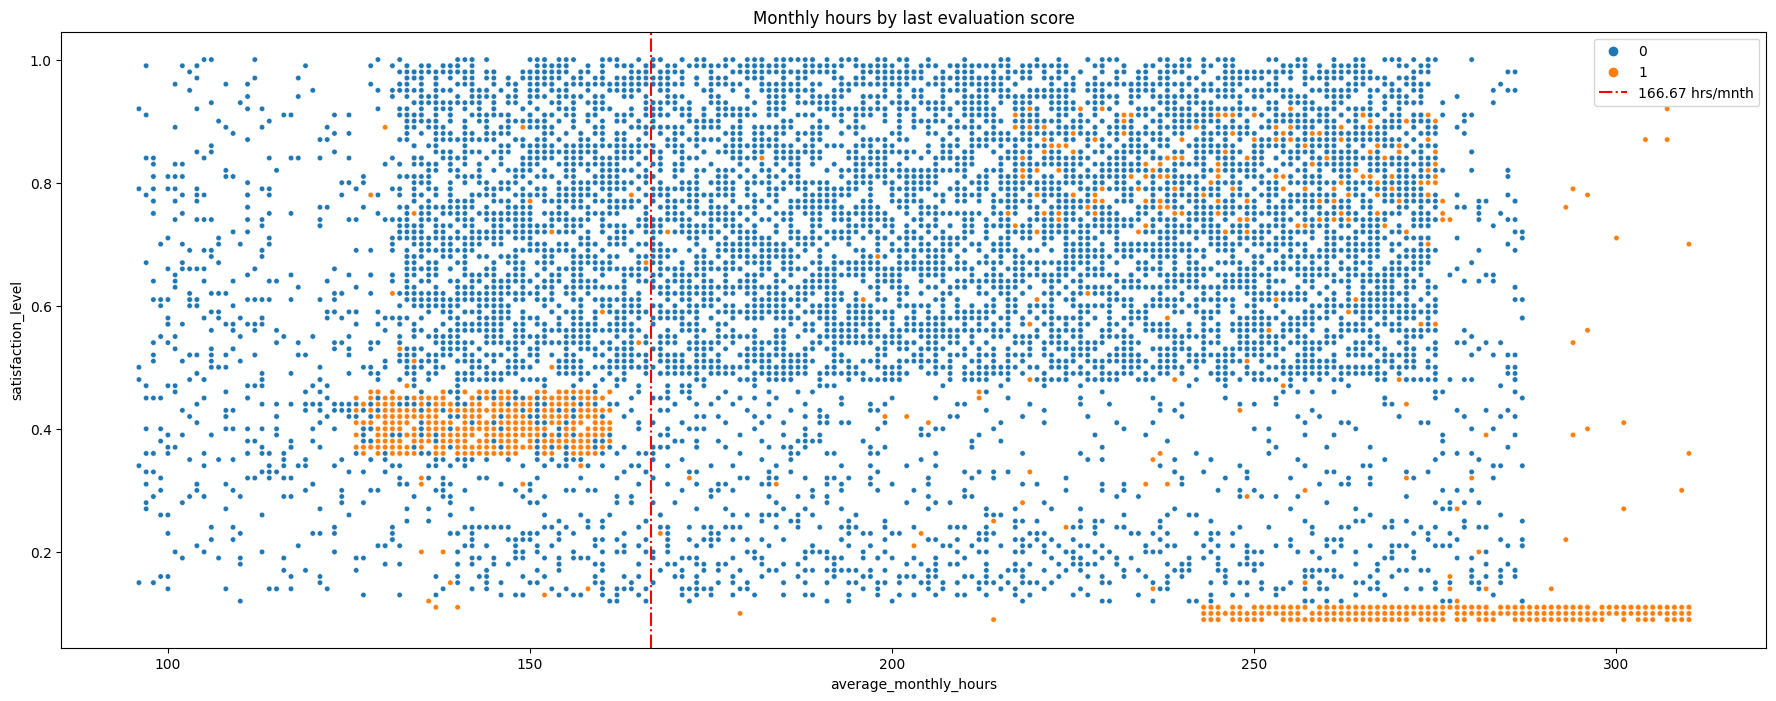

In [17]:
# Create a scatterplot of 'average_monthly_hours' versus 'satisfaction_level', compairing stayed versus left

plt.figure(figsize = (22,8))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', s = 15)
plt.axvline(166.67, ls = '-.', color = 'red', label = '166.67 hrs/mnth')
plt.legend()
plt.title('Monthly hours by last evaluation score')
plt.show()

There are three group of employees who left the company.
* a group of employees who worked between ~240-320 hours monthly and their satisfaction level close to zero. long working may lead to lower satisfaction score.
* some employee have worked in normal working hours with satisfaction level around 0.4. This is difficult to speculate why they might have left.
* Some employees worked ~ 210-280 hours and have satisfaction level ~0.7-0.9

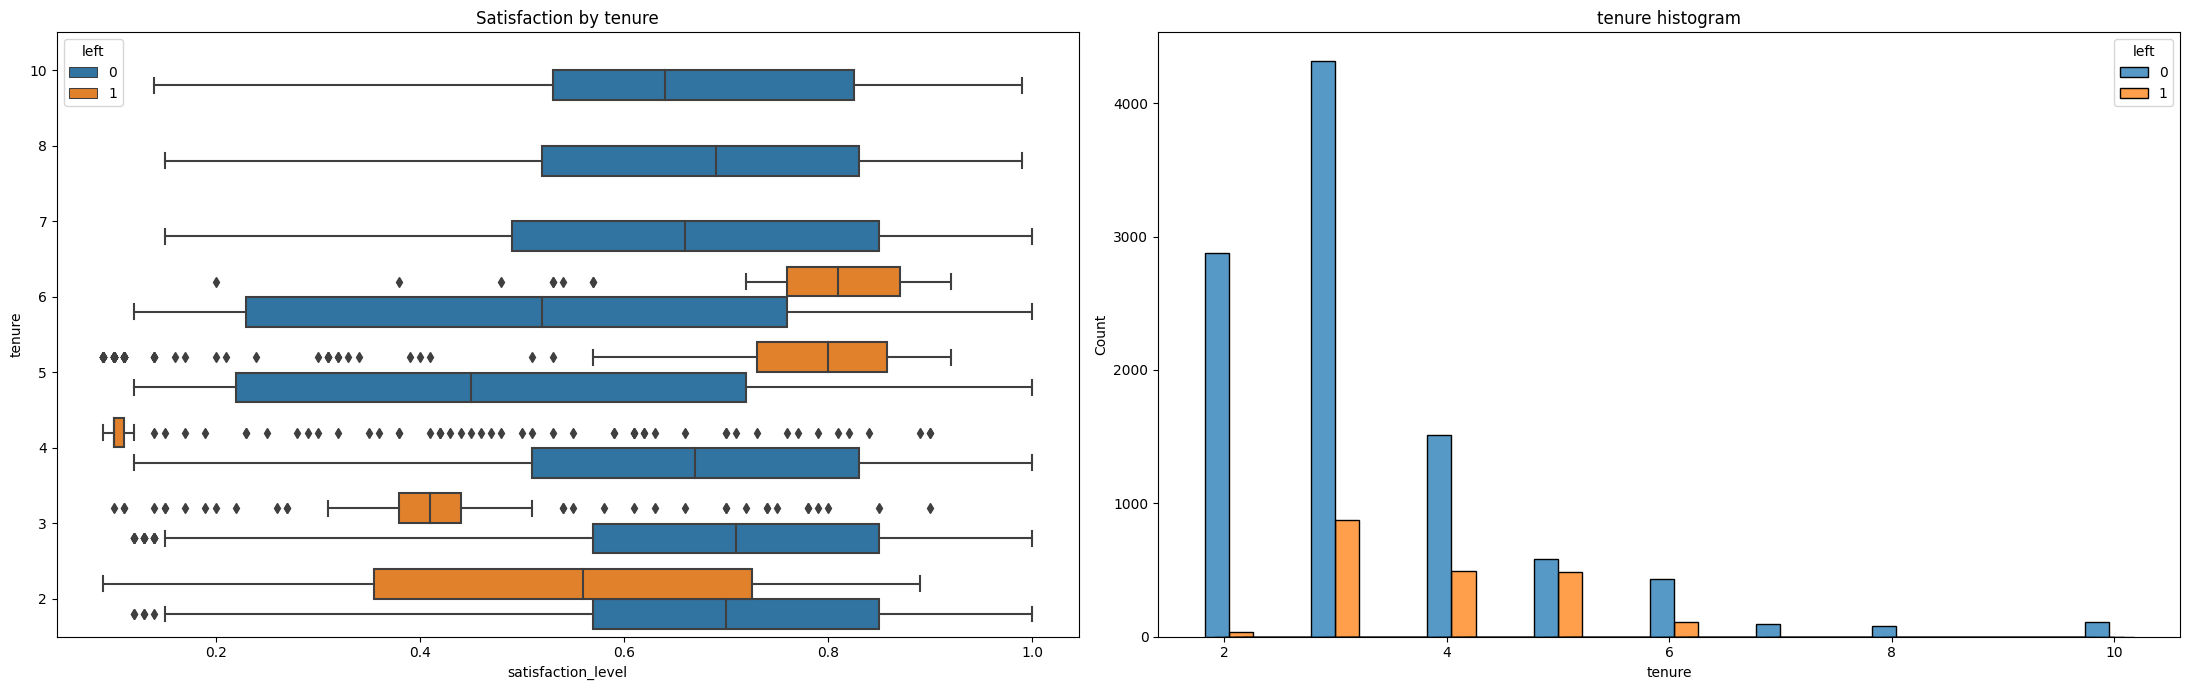

In [18]:
# create boxplot showing distribution of 'satisfaction_level' by 'tenure'

fig, ax = plt.subplots(1,2, figsize = (22,7))
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h',ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure')

sns.histplot(data = df1, x = 'tenure', hue = 'left' ,multiple = 'dodge',shrink = 5, ax = ax[1])
ax[1].set_title('tenure histogram')
fig.tight_layout()
plt.show()

* Employee who left fall into two groups categories : disatisfied employee with shorter tenure and very satisfied employee with mid-length tenure.
* Four-year employee who left seem to have unusally low satifcation level.
* Longest-tenured employee didn't leave. Their satisfaction align with those of newer employee whoi stayed.
* Histogram shows there are few longer-tenure employee, it is possible that they high ranking, high paid employee.

In [19]:
# calcuate mean and meadian of satisfaction score of employee who left and stayed
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


mean and median satisfaction scores of employees who left are lower than those of employees who stayed.

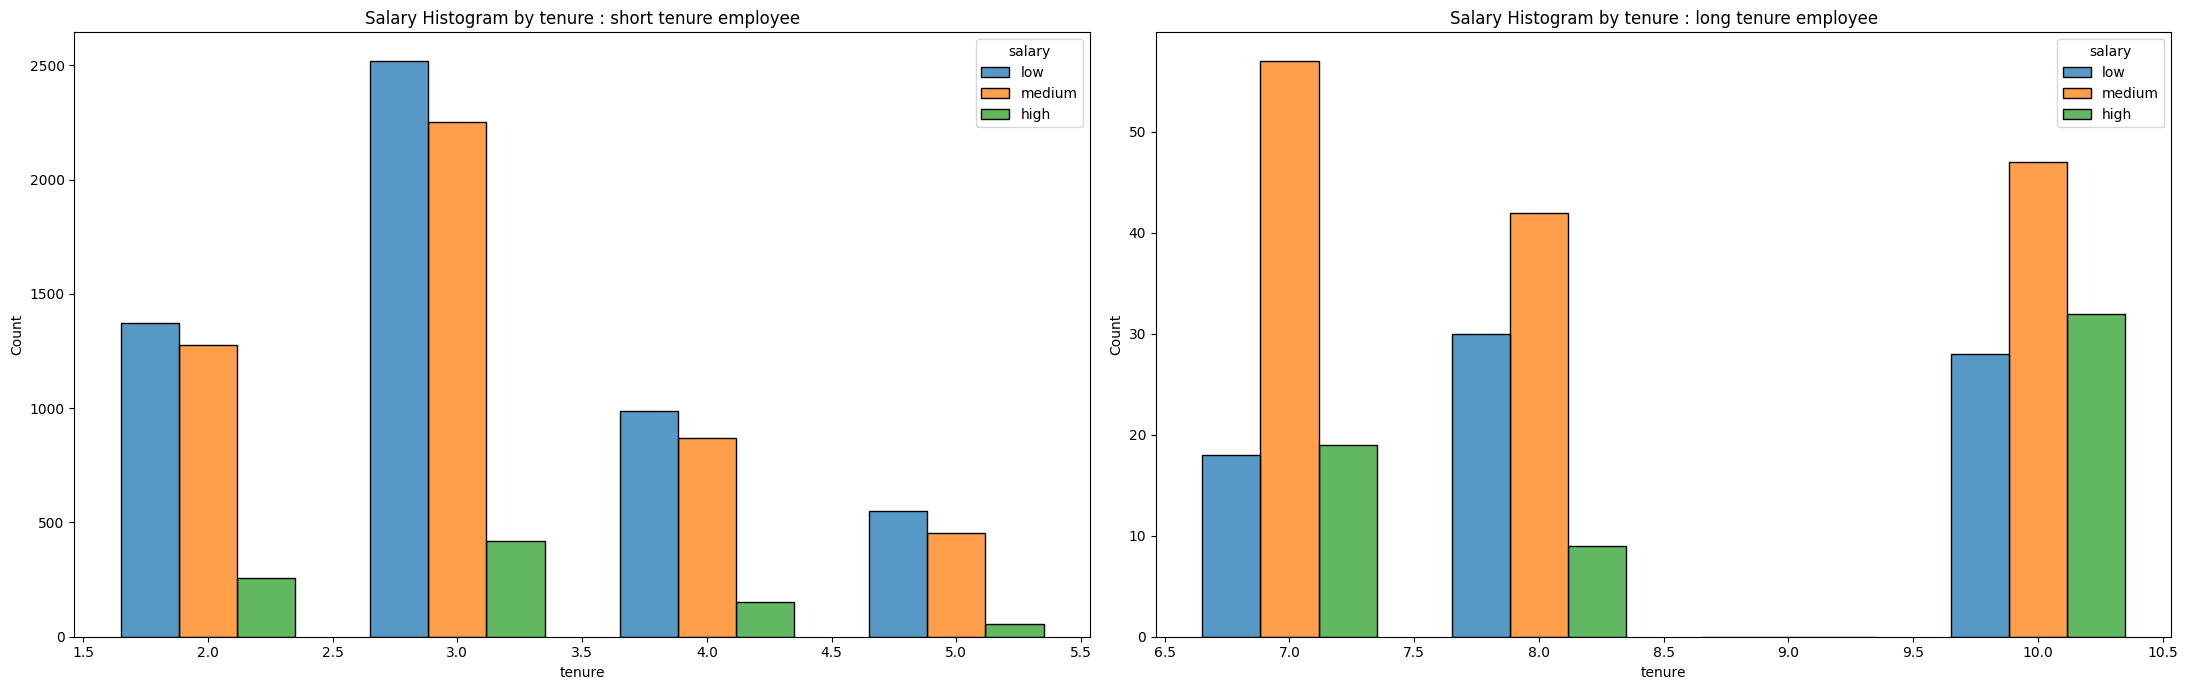

In [20]:
#create salary histogram
fig, ax = plt.subplots(1,2, figsize = (22,7))
sns.histplot(data = df1[df1['tenure'] < 6], x = 'tenure',hue ='salary',multiple = 'dodge', 
             hue_order = ['low','medium', 'high'], discrete = True, shrink = 0.7, ax = ax[0])
ax[0].set_title('Salary Histogram by tenure : short tenure employee')

sns.histplot(data = df1[df1['tenure'] > 6], x = 'tenure',hue ='salary',multiple = 'dodge', 
             hue_order = ['low','medium', 'high'], discrete = True, shrink = 0.7, ax = ax[1])
ax[1].set_title('Salary Histogram by tenure : long tenure employee')

fig.tight_layout()
plt.show()

The plot above shows that long-tenured employees were not disproportionately comprised of higher-paid employees.

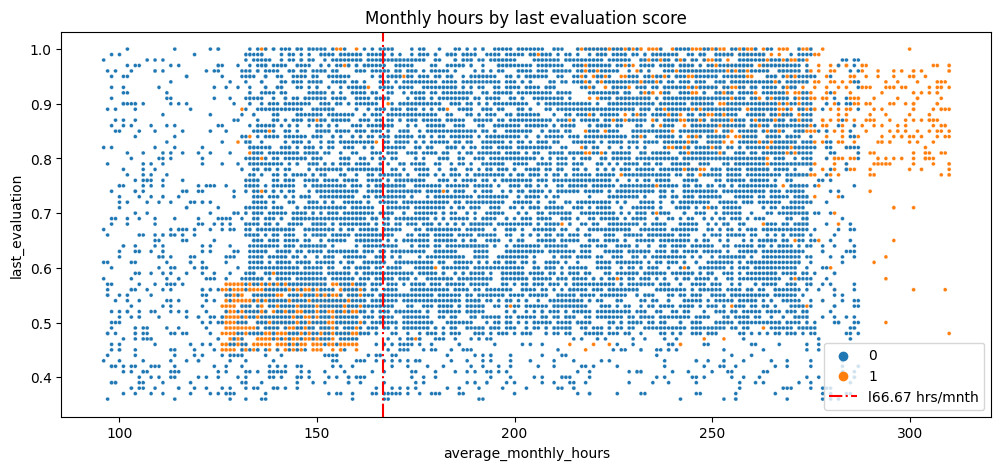

In [21]:
#create scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize = (12,5))
sns.scatterplot(df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', s = 8)
plt.axvline(166.67,ls = '-.', color = 'red', label = 'l66.67 hrs/mnth')
plt.title('Monthly hours by last evaluation score')
plt.legend()
plt.show()

* The scatterplot indicates two groups of employees who left: overworked employees who performed ver well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
* There isn't a high percentage of employees in the upper left quadrant of this plot; but working worng hours doesn't guarandee a good evualation score
* Most of the employees work well over 167 hours per month.

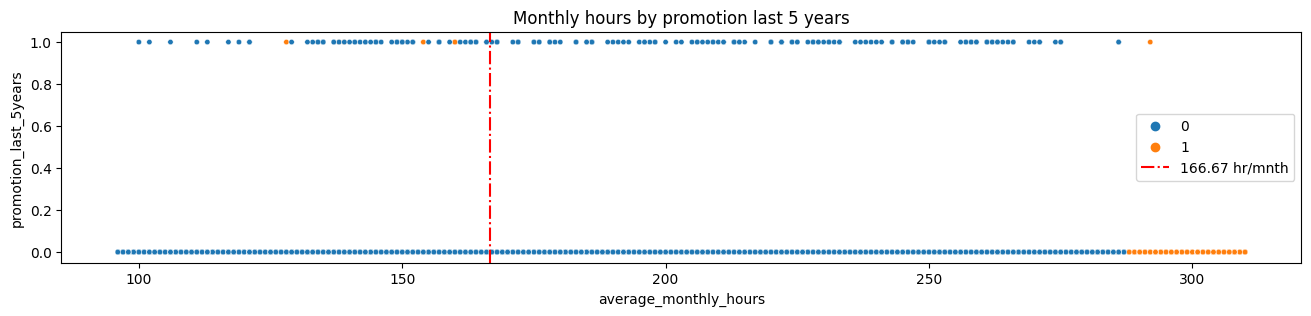

In [22]:
# create scatter plot between 'average_monthly_hours' and 'promotion_last_5years'
plt.figure(figsize = (16,3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', s = 15)
plt.axvline(166.67, ls = '-.', color = 'red', label = '166.67 hr/mnth')
plt.title('Monthly hours by promotion last 5 years')
plt.legend()
plt.show()

* Very few employees who were promoted in the last five years left.
* Very few employees who worked the most hours weer promoted.
* All of the employees who lefft were working the longest hours. 

In [23]:
#Display count for each department
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

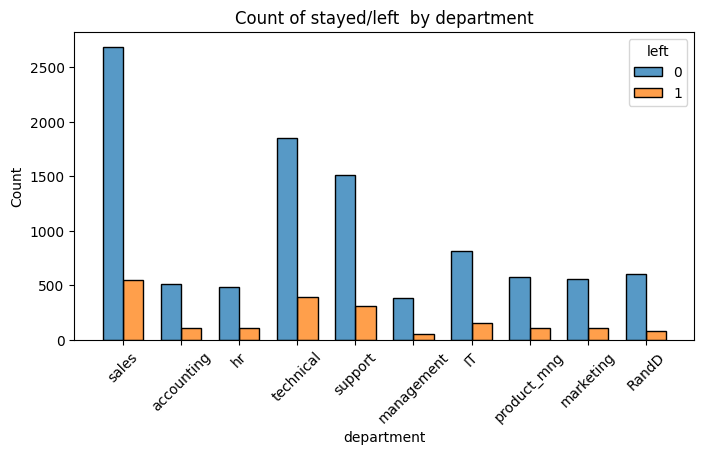

In [24]:
# department distribution of employees who left
plt.figure(figsize = (8,4))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete = True, multiple = 'dodge', shrink = 0.7)
plt.xticks(rotation = 45)
plt.title('Count of stayed/left  by department')
plt.show()

There doesn't seems to be any department that differs significantly in its proportion of employees who left to those who stayed.

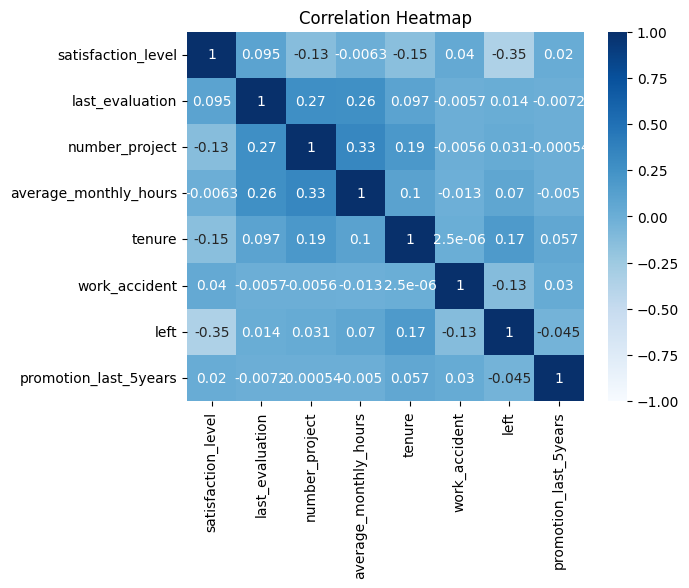

In [25]:
# create correlation heatmap
sns.heatmap(data = df1.corr(numeric_only = True),vmin = -1, vmax = 1, annot = True, cmap = 'Blues')
plt.title('Correlation Heatmap')
plt.show()

* The correlation map confirms that number of projects, monthly hours, and evaluation scores are all have some positive correlation.
* Whether the employee leave the company neatively correalate with their satisfaction level.

### Insights

It appears that employee leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally low satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probabily burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

### Logistic Regression Model